<a href="https://colab.research.google.com/github/michelleaeh/CE888_Laboratory/blob/master/Lab4_bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Load the data from bank-assitional-full.csv**

In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv",delimiter=";")

**Convert to dummies using df_dummies=pd.get_dummies(df)**

In [0]:
df_copy=pd.get_dummies(df)

**Columns "y_no" and "duration" must be deleted - use something like del df_copy["attribute"] for this**

In [0]:
del df_copy["y_no"]
del df_copy["duration"]

**Plot histogram of the label y_yes**

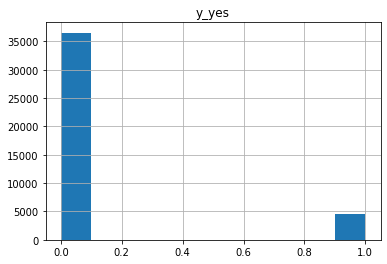

In [5]:
histogram=df_copy.hist(column='y_yes')

#https://stackoverflow.com/questions/42496508/histogram-on-pandas-column
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

**Get the values and run a classifier (with outcome y_yes)**

In [0]:
features=df_copy.drop('y_yes', axis=1)
outcome=df_copy['y_yes']

X_df=features.copy()
X_df.head()
y_df=outcome.copy()
y_df.head()

xtrain,xtest,ytrain,ytest=train_test_split(X_df,y_df,test_size=0.3,random_state=1)

clf=ExtraTreesClassifier(n_estimators=100,max_depth=4)
clf=clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)

**Report the results of 10-Kfold stratified cross-validation**


In [7]:
scores = cross_val_score(clf, xtrain, ytrain, cv=10,scoring = make_scorer(acc))
dummy_clf = DummyClassifier()
dummy_clf.fit(xtrain,ytrain)
print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(ytest,dummy_clf.predict(xtest))))

ACC: 0.90 +/- 0.00
Dummy ACC: 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**Get sample importances and a confusion matrix**

*Sample importances*

Feature ranking:
1. pdays (0.245060)
2. nr.employed (0.154239)
3. poutcome_success (0.149020)
4. euribor3m (0.090105)
5. emp.var.rate (0.072553)
6. cons.conf.idx (0.038536)
7. cons.price.idx (0.027964)
8. poutcome_nonexistent (0.027658)
9. contact_cellular (0.024414)
10. month_mar (0.024105)
11. month_may (0.020632)
12. contact_telephone (0.016164)
13. month_sep (0.015738)
14. previous (0.014849)
15. month_oct (0.014516)
16. poutcome_failure (0.011045)
17. default_no (0.007128)
18. default_unknown (0.006520)
19. job_retired (0.005663)
20. month_jun (0.005184)
21. job_blue-collar (0.004771)
22. age (0.003894)
23. month_jul (0.002739)
24. month_dec (0.002270)
25. month_apr (0.001976)
26. job_student (0.001939)
27. day_of_week_mon (0.001808)
28. month_nov (0.001162)
29. education_basic.9y (0.001126)
30. month_aug (0.001117)
31. marital_single (0.000738)
32. marital_married (0.000500)
33. campaign (0.000499)
34. education_university.degree (0.000438)
35. day_of_week_tue (0.000393)
36. educ

(0, 0.5730848700813335)

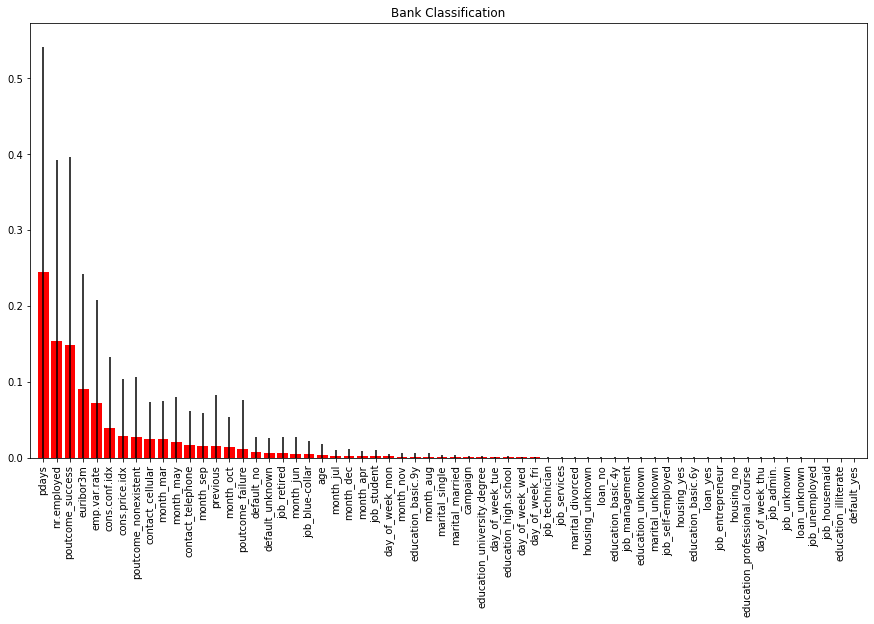

In [8]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")
features=list(df_copy.columns)
for f in range(X_df.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

#Plot the feature importances of the forest
fig = plt.figure()
plt.title("Bank Classification")
plt.bar(range(X_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_df.shape[1]), np.array(features)[indices],rotation=90)
plt.xlim([-1, X_df.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

*Confusion matrix*

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Compute confusion matrix
y_pred = clf.predict(xtest)
cnf_matrix = confusion_matrix(ytest, y_pred)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

NameError: ignored

<Figure size 432x288 with 0 Axes>